In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# df = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T6.1\housing data.csv", sep=",", header=None, engine="python", encoding="latin-1")

In [27]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
X_train = df_train.drop("MEDV", axis=1)
y_train = df_train['MEDV']
X_test = df_test.drop('MEDV', axis=1)
y_test = df_test['MEDV']

He  Importado el Train - Test del ejercicio anterior, por lo que su procesado se encuentra en la tarea 5. alli se ha hecho limpieza y  

#### Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

In [28]:
dtc = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

¿ Por que ?

dtc = DecisionTreeRegressor(random_state=42): Se escogio por que es uno de los modelos mas usados por su facilidad al interpretarse y visualizarse. no requiere normalizacion, ni asumen relaciones lineales y tiene parametros que me permiten ajustar su complejidad y evitar el sobreajuste. se ha usado el (random_state=42), para controlar las aleatoriedades de los datos y la reproducibilidad. 

rfr = RandomForestRegressor(n_estimators=100, random_state=42):  Este modelo es útil para problemas de regresión, donde se busca predecir valores numéricos a partir de variables predictoras. (n_estimators=100), Este parámetro especifica el número de árboles en el bosque aleatorio. En este caso, se ha establecido en 100. Aumentar el número de árboles generalmente mejora la robustez y el rendimiento del modelo, pero también puede aumentar el tiempo de entrenamiento. (random_state=42), lo utilizo para controlar la aleatoriedad y la reproductibilidad de los datos. 

lr = LinearRegression():  este modelo aborda, regresión lineal desde un enfoque estadístico que modela la relación lineal entre una variable dependiente (o respuesta) y una o más variables independientes (o características).

Cada uno de estos modelos cumple una o mas "features", que lo hacen atractivo para mi "target", la idea es que luego de dejorar los modelos y ejecutar metricas, darme cuenta cual de los tres es mas eficiente y se ajusta más a mis datos. 

In [41]:
models = [DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(n_estimators=100, random_state=42),
          LinearRegression()]

In [54]:
predictions = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[type(model).__name__] = y_pred
df_predictions = pd.DataFrame(predictions)

Con un ciclo for hacemos predicciones para cada modelo de los tres escogidos.

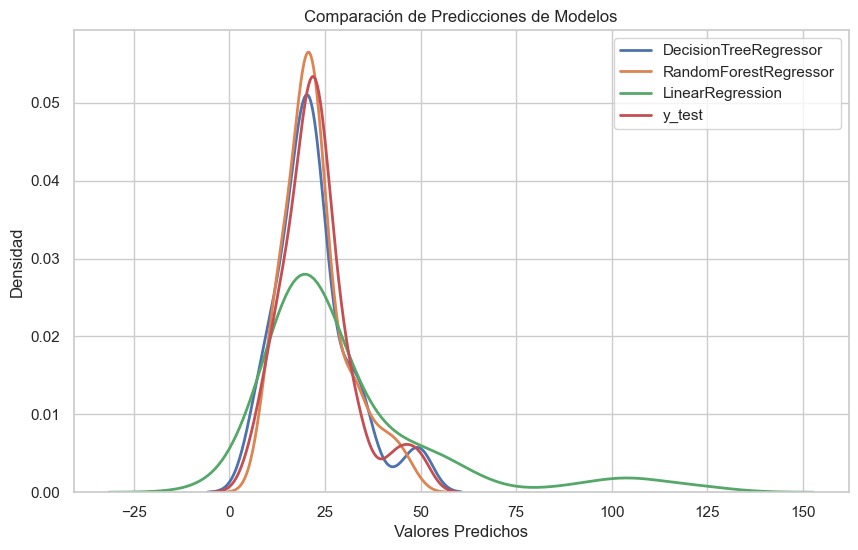

In [56]:
df_predictions['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions.columns:
    sns.kdeplot(df_predictions[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de Predicciones de Modelos')
plt.legend()
plt.show()

En esta grafica podemos comprar los tres modelos para observar su prediccion, respecto al y_test original en rojo, vemos como en la cumbre de la campana, RandomForestRegressor es aparentemente es el mas cercano, pero si vemos a lado y lado, vemos como DecisionTreeRegresso, tiene mas semejanza en el comportamiento de los datos, al y_test original. graficamente este es el resultado ahora tenemos que comparar los rendimientos de los modelos con metricas para verificar cual es el mejor modelo. 

#### Ejercicio 2
Compárales en base al MSE y al R2.

In [72]:
output1 = [] #almacenamos los resultados
for model in models: #hacemos un ciclo for
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred) #calculamos mse
    r2 = r2_score(y_test, y_pred) #calculamos r2
    output1.append({'Model': type(model).__name__, 'MSE': mse, 'R^2': r2}) #configuramos una tabla para mostrar resultados.
output_df1 = pd.DataFrame(output1) #creamos dataframe con resultados
output_df1

,Model,MSE,R^2
0,DecisionTreeRegressor,29.301078,0.661223
1,RandomForestRegressor,15.103753,0.825371
2,LinearRegression,461.550364,-4.336414


##### Comparacion de modelos: 

MSE(Mean Squared Error):: El modelo con mas ajuste (menor valor), a los datos (promedio de errrores al cuadrado)(Las predicciones estan mas cerca de valores reales ) es: RandomForestRegressor con 15.10, luego el DecisionTreeRegressor con 29.30 y luego LinearRegression ( que  esta muy lejos de ser un buen modelo) con 461.55.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor  con 0.82, luego DecisionTreeRegressor con 0.66 y por ultimo LinearRegression con -4.33. 

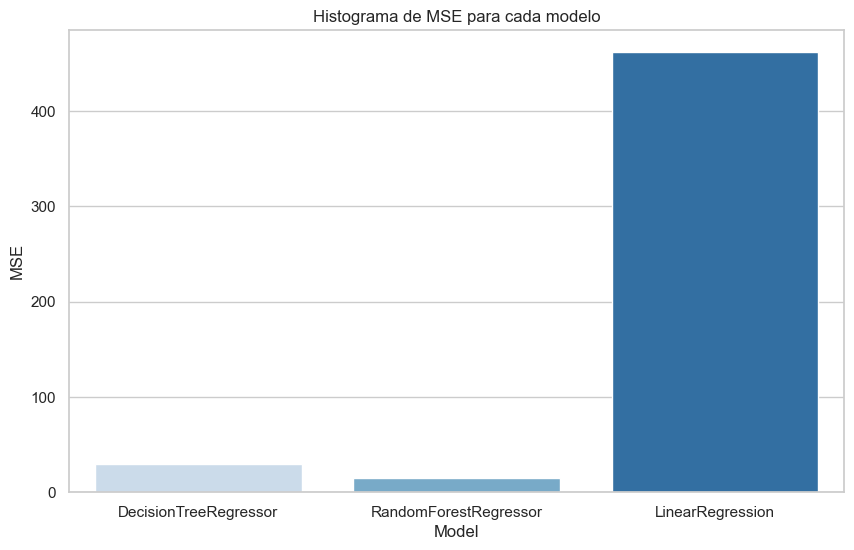

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=output_df1, palette="Blues")
plt.title('Histograma de MSE para cada modelo')
plt.show()

MSE= El modelo con menor valor sera el que mas se ajuste de los datos, RandomForestRegressor es el que mas se ajusta.

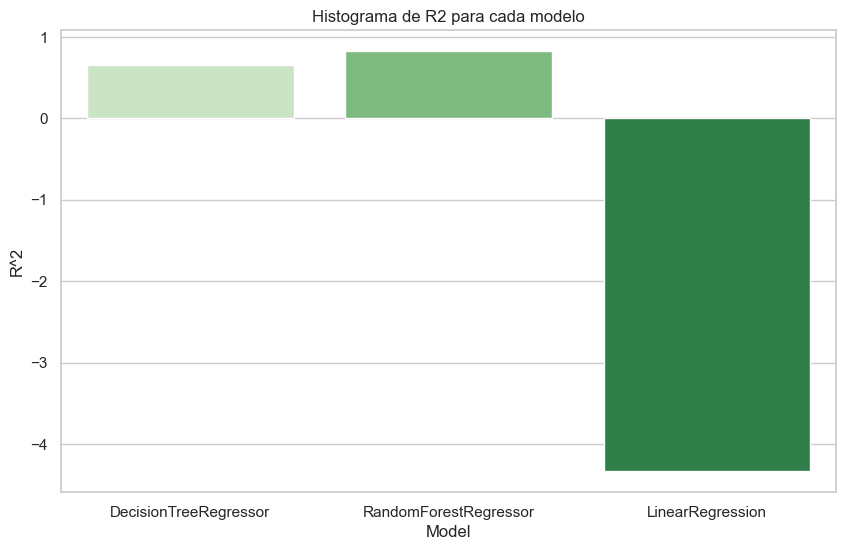

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=output_df1, palette="Greens")
plt.title('Histograma de R2 para cada modelo')
plt.show()

R2= El modelo con el valor mas cwercano a 1 es que que mas ajusta de los datos, RandomForestRegressor es el mas cercano a 1. 

##### Conclusion: 

RandomForestRegressor nos da la mejores metricas para MSE (15.103753) Y R2 (0.825371). por lo tanto es el modelo que mas se ajusta a nuestros datos. nuestro mejor modelo para este caso. 

#### Ejercicio 3
Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

GridSearchCV nos permite buscar hiperparametros

In [120]:
dtc = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

In [121]:
parametros_decision_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 
grid_search_dt = GridSearchCV(estimator=dtc, param_grid=parametros_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros para DecisionTreeRegressor:", grid_search_dt.best_params_)

Mejores parámetros para DecisionTreeRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


Parametros: DecisionTreeRegressor

max_depth: Limita la profundidad máxima de cada árbol. Reducir este valor puede hacer que los árboles sean menos profundos y, por lo tanto, más rápidos de construir. Sin embargo, también podría afectar la capacidad del modelo para capturar patrones complejos.

min_samples_split: Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Aumentar este valor puede hacer que el modelo sea más eficiente, pero podría resultar en árboles menos profundos y, por ende, en una menor capacidad para ajustarse a los datos.

min_samples_leaf: Especifica el número mínimo de muestras requeridas para estar en un nodo hoja. Al igual que min_samples_split, aumentar este valor puede mejorar la eficiencia a expensas de la profundidad del árbol.

In [122]:
parametros_random_forest = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=parametros_random_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Mejores parámetros para RandomForestRegressor:", grid_search_rf.best_params_)

Mejores parámetros para RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Parametros: RandomForestRegressor los parametros datos ayudan a mejorar su rendimiento, los rangos para cada parametro pueden ser modificados en sus respectivos rangos. he modificado sus parametros, por el rendimiento de la maquina,disminuyendo sus posibles valores. 

n_estimators: Este parámetro controla el número de árboles en el bosque. Reducir este valor puede disminuir el tiempo de entrenamiento y el uso de memoria, pero también puede afectar la capacidad del modelo para generalizar bien.

max_depth: Limita la profundidad máxima de cada árbol. Reducir este valor puede hacer que los árboles sean menos profundos y más rápidos de construir, pero también podría afectar la capacidad del modelo para capturar patrones complejos.

min_samples_split: Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Aumentar este valor puede hacer que el modelo sea más eficiente, pero podría resultar en árboles menos profundos y, por lo tanto, en una menor capacidad para ajustarse a los datos.

min_samples_leaf: Especifica el número mínimo de muestras requeridas para estar en un nodo hoja. Aumentar este valor puede hacer que el modelo sea más eficiente, pero nuevamente, podría resultar en un modelo con menor capacidad predictiva.

In [123]:
# No hay hiperparámetros específicos para ajustar en LinearRegression
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

##### Conclusion busqueda de hiperparametros:

Los hiperparametros nos permiten mejorar los modelos para que las predicciones sean mas exactas y los modelos se ajusten más a nuestros datos.

#### Ejercicio 4
Compara su rendimiento empleando la aproximación Train/test o empleando todos los datos (validación interna).


Voy a comparar los modelos empleando Train/test, ya que nos permite avitar sobreajustes,  permite tener una estimación realista del rendimiento del modelo en nuevos datos.

In [173]:
best_models = [best_dt_model, best_rf_model, lr_model]

Hacemos un diccionario con los best_model de cada modelo mejorado por hiperparametros.

In [201]:
predictions2 = {}
for model in best_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions2[type(model).__name__] = y_pred

Hacemos las predicciones para cada modelo mejorado

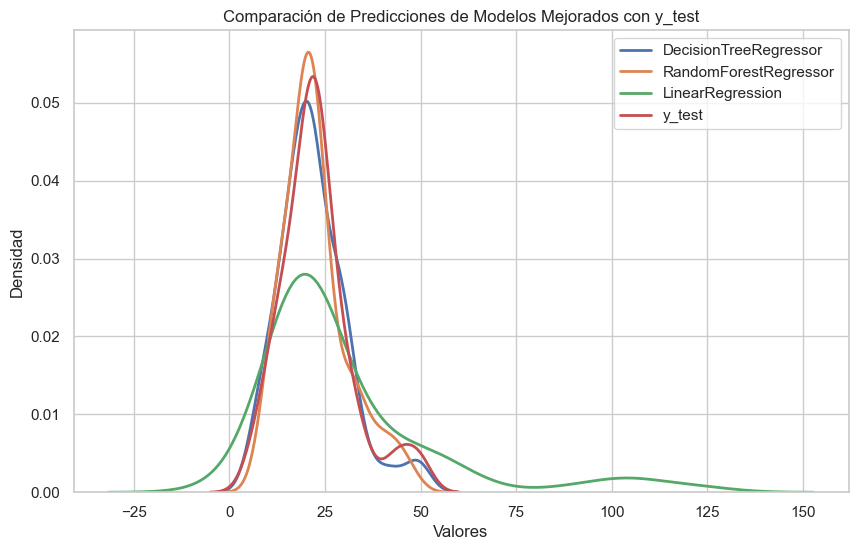

In [202]:
predictions2['y_test'] = y_test
df_predictions2 = pd.DataFrame(predictions2)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for column in df_predictions2.columns:
    sns.kdeplot(df_predictions2[column], label=column, linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Comparación de Predicciones de Modelos Mejorados con y_test')
plt.legend()
plt.show()

Vemos graficamente los modelos mejorados, se puede ver una leve mejoria en el modelo DecisionTreeRegressor. pero el RandomForestRegressor, sigue siendo el mejor modelo. 

In [177]:
output1 = [] #almacenamos los resultados
for model in best_models: #hacemos un ciclo for
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred) #calculamos mse
    r2 = r2_score(y_test, y_pred) #calculamos r2
    output1.append({'Model': type(model).__name__, 'MSE': mse, 'R^2': r2}) #configuramos una tabla para mostrar resultados.
output_df1 = pd.DataFrame(output1) #creamos dataframe con resultados
output_df1

,Model,MSE,R^2
0,DecisionTreeRegressor,19.004061,0.780276
1,RandomForestRegressor,15.103753,0.825371
2,LinearRegression,461.550364,-4.336414


##### Comparacion de rendimeinto de modelos luego de ser mejorados:
MSE(Mean Squared Error):: El modelo con mas ajuste (menor valor), a los datos (promedio de errrores al cuadrado)(Las predicciones estan mas cerca de valores reales ) es: RandomForestRegressor es el mejor modelo con 15.10, luego el DecisionTreeRegressor ha mejorado su metrica MSE de 29.30 a 19.00 y luego LinearRegression ( que esta muy lejos de ser un buen modelo) con 461.55. mantiene su metrica pues este modelo no tiene hiperparametros.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor, sigue siendo el mejor modelo con 0.82, luego DecisionTreeRegressor, ha mejorado su metrica r2 de 0.66 a 0.78 y por ultimo LinearRegression con -4.33 mantuvo su metrica igual pues no tiewne hiperparametros.

#### El mejor modelo RandomForestRegressor

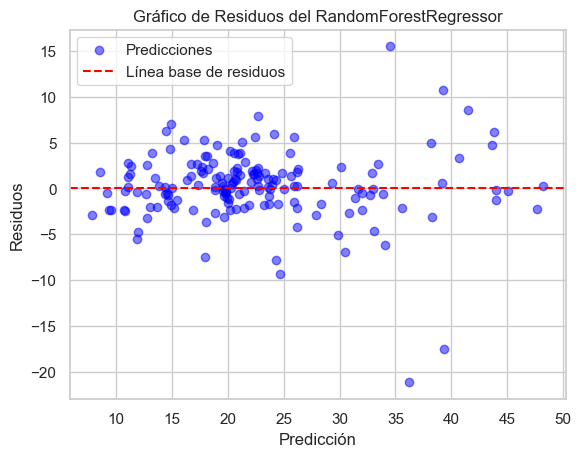

In [204]:
y_pred_rf = best_rf_model.predict(X_test)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, c='blue', label='Predicciones', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Línea base de residuos')
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos del RandomForestRegressor")
plt.legend()
plt.show()

Este gráfico muestra la diferencia entre los valores reales y las predicciones en el eje x. Un buen modelo tendría residuos distribuidos aleatoriamente alrededor del eje x=0. aunque vemos que los residuos en algunos casos se distancian del eje x, RandomForestRegressor es el mejor modelo de los escogidos para hacer predicciones. podria mejorarse el modelo al aumentar los valores de sus hiperparametros para hacerlo mas exacto a la hora de predecir. 

##### Conclusion de evaluacion de modelos: 

RandomForestRegressor nos sigue dando la mejores metricas luego de haber sido mejorados los modelos, siendo para este modelo: MSE (15.103753) Y R2 (0.825371). por lo tanto es el modelo que mas se ajusta a nuestros datos. nuestro mejor modelo para este caso.

##### Ejercicio 5
No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [206]:
X_train_1 = X_train.drop('RM', axis=1)
X_test_1 = X_test.drop('RM', axis=1)

Eliiminamos la variable RM del X_train y X_test, para las predicciones.

In [207]:
best_models = [best_dt_model, best_rf_model, lr_model]

In [208]:
predictions3 = {}
for model in best_models:
    model.fit(X_train_1, y_train)
    y_pred = model.predict(X_test_1)
    predictions3[type(model).__name__] = y_pred

Hacemos las predicciones para cada modelo mejorado con X_train y X_test sin la variable RM

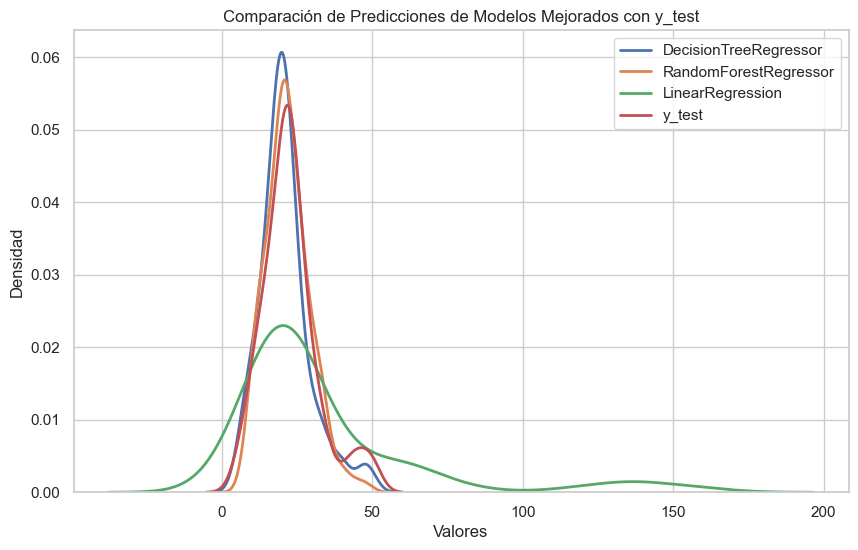

In [211]:
predictions3['y_test'] = y_test
df_predictions3 = pd.DataFrame(predictions3)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for column in df_predictions3.columns:
    sns.kdeplot(df_predictions3[column], label=column, linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Comparación de Predicciones de Modelos Mejorados con y_test')
plt.legend()
plt.show()

Vemos graficamente los modelos mejorados, para X_train y X_test, sin la variable RM, se puede ver el cambio de los modelos al suprimir esta variable, aunque el RandomForestRegressor, sigue siendo el mas ajustado a los datos y el que sigue la forma de y_test, el DecisionTreeRegressor en cambio ha empeorado su rendimiento frente a y_test. por tanto esto confirma que le modelo que mas se ajusta a y_test es el RandomForestRegressor.

In [212]:
output1 = [] #almacenamos los resultados
for model in best_models: #hacemos un ciclo for
    model.fit(X_train_1, y_train)
    y_pred = model.predict(X_test_1)
    mse = mean_squared_error(y_test, y_pred) #calculamos mse
    r2 = r2_score(y_test, y_pred) #calculamos r2
    output1.append({'Model': type(model).__name__, 'MSE': mse, 'R^2': r2}) #configuramos una tabla para mostrar resultados.
output_df1 = pd.DataFrame(output1) #creamos dataframe con resultados
output_df1

,Model,MSE,R^2
0,DecisionTreeRegressor,36.181124,0.581676
1,RandomForestRegressor,22.473125,0.740167
2,LinearRegression,927.003539,-9.717952


##### Comparacion de rendimiento de modelos con X_train y X_test sin variable RM:

Cabe aclarar que luego de ser suprimida la variabel RM, el rendimiento de los modelos disminuyo. 

MSE(Mean Squared Error):: El modelo con mas ajuste (menor valor), a los datos (promedio de errrores al cuadrado)(Las predicciones estan mas cerca de valores reales ) es: RandomForestRegressor es el mejor modelo con 22.47, luego el DecisionTreeRegressor con MSE de 36.18 y luego LinearRegression ( que esta muy lejos de ser un buen modelo) con 927.00.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor, sigue siendo el mejor modelo con 0.74, luego DecisionTreeRegressor, con 0.58 y por ultimo LinearRegression con -9.71. 


##### Conclusion: 
La variable RM: (Numero media de habitaciones por vivienda) es independiente y es importante a la hora de predecir nuestra variable dependiente MEDV, la ausencia de esta variabel hara que las predicciones empeoren y los medelos disminuyan su rendimeinto.  